In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def parse_output(folder: str):
  uncoloured = []
  lake_sizes = []
  lake_count = []
  
  #Generate all the data
  from os import listdir
  for path in listdir(folder):
    path = f"{folder}/{path}"
    data = np.genfromtxt(path, delimiter=',', dtype=int)
    uncoloured.append(data[:,0])
    lake_sizes.append(np.array(data[:,1:]))
    lake_count.append(np.array([len(water_lvl[np.where(water_lvl != 0)]) for water_lvl in data[:,1:]]))
    
  #Immediatly normalise stuff to cut down on bloat
  uncoloured = uncoloured / np.max(uncoloured)
  lake_count = lake_count / np.max(lake_count)
    
  return (np.array(uncoloured), np.array(lake_count), lake_sizes)

uncol_ppv, n_lakes_ppv, lake_sizes_ppv = parse_output("/home/raulwolters/Documents/FRIGGsims_Results/PPV/")
uncol_ppp, n_lakes_ppp, lake_sizes_ppp = parse_output("/home/raulwolters/Documents/FRIGGsims_Results/PPP/")

In [4]:
def px_per_waterlevel(px_sizes, raw):
  per_wlvl = [[] for _  in range(254)]
  sized_lakes = [x * y for x, y in zip(raw, px_sizes)]  
  for all_lakes in sized_lakes:
    for idx, lakes in enumerate(all_lakes):
      if len(lakes) != 0: per_wlvl[idx].append(lakes)
  return [np.concatenate(li) for li in per_wlvl]

#convert pixel-sized lakes to pc-sized lakes
def conv_px_size(px_sizes, lakes):
  return [px_size * lake for (px_size, lake) in zip(px_sizes, lakes)]

def fold(lakes, waterlevel: slice | int):
  return np.concatenate([lake[waterlevel,:].flatten() for lake in lakes])

In [18]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib

#make histogram!
NUM_BINS = 100
IMG_SIZE = 512

def make_histogram(real_areas, xscale="log", yscale="linear", ymax=250):
  global bins #god I hate python
  if xscale == "linear":
    bins = np.linspace(1, IMG_SIZE**2, num=NUM_BINS)[1:]
  else:
    np.logspace(0, np.log10(IMG_SIZE**2), num=NUM_BINS)[1:]
  cmap = matplotlib.cm.get_cmap('viridis')
  cols = np.linspace(0, 1, 254) 
  
  fig, ax = plt.subplots(figsize=(6,2))
  ax_divider = make_axes_locatable(ax)  
  ax.hist(real_areas, bins, color=cmap(cols), stacked=True)
  ax.set_xscale(xscale)
  ax.set_yscale(yscale)
  
  ax.set_xlabel(f"{xscale} binned lake size ($Px^2$)")
  ax.set_ylabel("count")
  ax.set_xlim(np.min(bins), np.max(bins))
  ax.set_ylim(top=ymax)
  
  #yticks
  ax.set_yticks(np.round(np.linspace(start=0, stop=ymax, num=5)))
  
  #colorbar
  cax = ax_divider.append_axes('top', size="10%", pad="0%")
  fig.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(0, 254)),
    cax=cax,
    orientation='horizontal'
  )
  cax.xaxis.set_ticks_position('top')
  fig.show()

/tmp/ipykernel_14876/1047588890.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


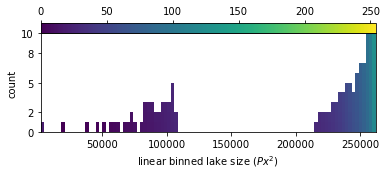

In [19]:
nl_lvl_1 = lake_sizes_ppv[12]
make_histogram(nl_lvl_1.transpose(), xscale='linear', ymax=10)

/tmp/ipykernel_12090/148634413.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


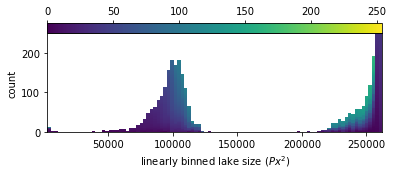

In [5]:
make_histogram(px_per_waterlevel(np.ones(len(lake_sizes_ppv)) ,lake_sizes_ppv))

/tmp/ipykernel_12090/148634413.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


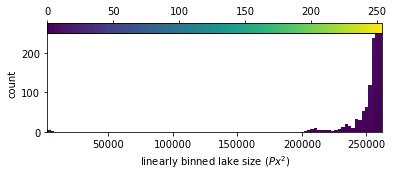

In [6]:
make_histogram(px_per_waterlevel(np.ones(len(lake_sizes_ppp)) ,lake_sizes_ppp))